In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Домашнее задание

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [12]:
#матрица корреляций с признаком-результатом
matrix = df.corr()['target']
matrix

index                             0.002701
back-suspension                  -0.159912
battery-capacity                  0.025703
charge-time                       0.110034
compression                       0.023138
consumption-mixed                 0.118195
cylinders-order                   0.376272
cylinders-value                   0.472177
engine-feeding                    0.012235
engine-start                      0.150944
engine-stop                      -0.137719
engine-type                      -0.125304
gear-type                         0.068319
luxury                            0.085707
max-speed                         0.111922
power-electro-kw                  0.028609
supply-system                     0.045416
valves                           -0.066402
valvetrain                        0.021120
weight                            0.339835
configurations_auto-premiere      0.106856
configurations_back-wheel-base    0.051349
configurations_front-brake        0.184791
configurati

<Axes: >

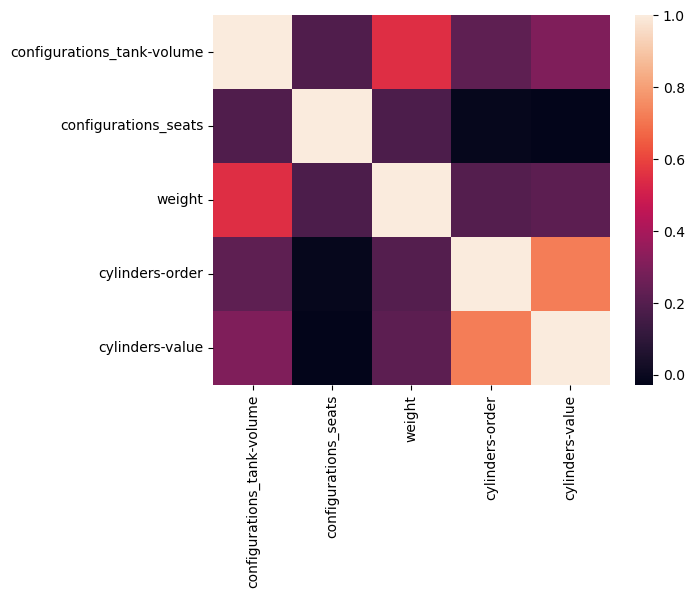

In [13]:
#тепловая карта нужных признаков
corr_matrix = df[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-order", "cylinders-value"]].corr()
sns.heatmap(corr_matrix)

In [14]:
#получим числовые значения для точности
print(df[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-order", "cylinders-value"]].corr())

                            configurations_tank-volume  configurations_seats  \
configurations_tank-volume                    1.000000              0.185502   
configurations_seats                          0.185502              1.000000   
weight                                        0.546153              0.180505   
cylinders-order                               0.224373             -0.014392   
cylinders-value                               0.302997             -0.028327   

                              weight  cylinders-order  cylinders-value  
configurations_tank-volume  0.546153         0.224373         0.302997  
configurations_seats        0.180505        -0.014392        -0.028327  
weight                      1.000000         0.199547         0.220476  
cylinders-order             0.199547         1.000000         0.720077  
cylinders-value             0.220476         0.720077         1.000000  


Наблюдается тесная связь между признаками cylinders-value и cylinders-order, она выше 0,7. С результатом меньше коррелирует order, удалим его.

In [15]:
df1 = df[['target', 'configurations_tank-volume', 'configurations_seats', 'weight', 'cylinders-value']]
df1

,target,configurations_tank-volume,configurations_seats,weight,cylinders-value
0,2360,40.0,13,820.0,3
1,3060,108.0,13,2350.0,7
2,2648,55.0,13,1350.0,4
3,2513,55.0,13,1090.0,4
4,2703,62.0,13,1410.0,4
...,...,...,...,...,...
43240,2510,47.0,13,-1.0,4
43241,2808,65.0,13,1545.0,4
43242,2520,55.0,13,1210.0,4
43243,2755,70.0,13,1660.0,5


C:\Users\mrrr_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


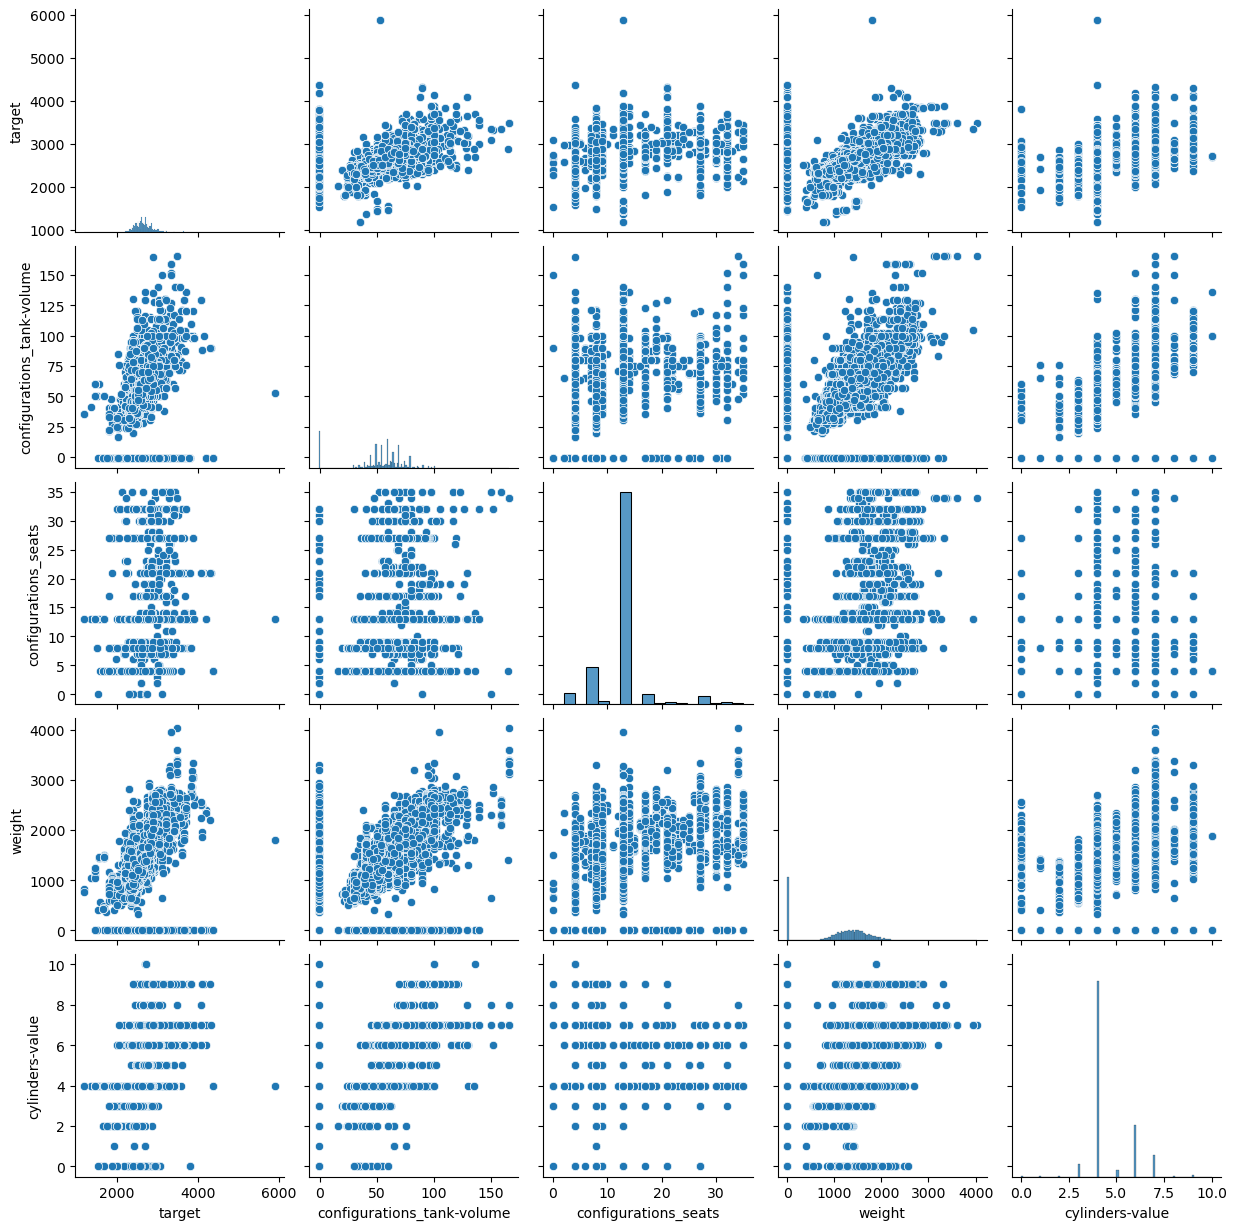

In [16]:
sns.pairplot(df1)

In [17]:
#разобьем отдельно факторы и результат
X = df1[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-value"]]
y = df1[["target"]]

In [18]:
#разобьем данные на тестовую и обучающую выборки
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
#стандартизируем выборки
scaler = StandardScaler()
X_train_st = scaler.fit_transform(train_X)
X_test_st = scaler.fit_transform(test_X)

**ТЕСТ 1**

In [26]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(X_train_st, train_y)

print(model.coef_, model.intercept_)

[[43.77429161 59.9772648  25.76818694 92.09532322]] [2659.80976047]


In [27]:
predictions = model.predict(X_test_st)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y, predictions)

0.38553651341516915

In [28]:
mean_squared_error(test_y, predictions)

35603.57768770953

**RIDGE БЕЗ УДАЛЕНИЯ ФАКТОРОВ**

In [29]:
X1 = df.drop(["target"], axis=1)
y1 = df[["target"]]
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [30]:
X_train_st1 = scaler.fit_transform(train_X1)
X_test_st1 = scaler.fit_transform(test_X1)

from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import linregress

#модель линейной регрессии
model_Ridge = Ridge()

#обучение модели
model_Ridge.fit(X_train_st1, train_y1)

print(model_Ridge.coef_, model_Ridge.intercept_)

#прогноз
predictions = model_Ridge.predict(X_test_st1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y1, predictions)

[[ 1.70992031e+00 -1.87979716e-02  1.71023513e+01  2.83050804e+01
  -2.25023652e+01 -4.10985732e+00 -1.66373271e+00  1.00882328e+02
  -1.40247408e+01  3.71899390e+01 -7.32859285e+00 -3.89253821e+01
   2.49890777e+01  7.04044967e+00 -2.00086895e+01  4.51577051e+00
   6.38852830e-01  7.99333685e+00  2.42325922e+00  2.21373905e+01
  -3.01575035e+01 -1.76304093e+01  9.58994343e+00 -4.69855318e+00
   5.19164393e+01  5.29662698e+01 -9.03424100e+00  1.35249524e+01
  -6.08719883e-02  8.67759069e+00 -1.78844784e+00]] [2659.80976047]


0.4645490349802144

In [31]:
mean_squared_error(test_y1, predictions)

31025.391170105046

**ТЕСТ 3**

In [32]:
#отберем факторы
X = df1[["configurations_tank-volume", "configurations_seats", "weight", "cylinders-value"]]
y = df1[["target"]]

In [33]:
#стаданртизация
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [34]:
LinReg = LinearRegression()
LinReg.fit(X_st, y)

print(LinReg.score(X_st, y))
print(mean_squared_error(reg.predict(X_st), y))

0.37830207675261474
496012.36517945083


C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print('intercept', LinReg.intercept_)
print('slope', LinReg.coef_)


intercept [2660.82624581]
slope [[44.79628961 60.58512608 24.09007883 94.41315769]]


**ТЕСТ 4**

In [36]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [37]:
dtree = DecisionTreeRegressor(random_state=101)

In [38]:
dtree.fit(X_train_st,train_y)

DecisionTreeRegressor(random_state=101)

In [39]:
import matplotlib.pyplot as plt
import plotly.express as px

In [40]:
prediction = dtree.predict(X_test_st)
print('RMSE : ', np.sqrt(metrics.mean_squared_error(test_y, prediction)))
print('R2 Score : ', r2_score(test_y, prediction))

RMSE :  168.4611040280236
R2 Score :  0.5102192353398629
